In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Collection**

In [ ]:
#Download Eskom hydropower data
!gdown --id 11wulapkQqQLR6hA_qcBEZM8qtlWYVCgK


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11wulapkQqQLR6hA_qcBEZM8qtlWYVCgK
To: /content/ESK10953 (3).csv
100% 1.95M/1.95M [00:00<00:00, 52.9MB/s]


In [ ]:
#Download data for Driel Dam
!gdown --id 1p_Pi9dlnLEdCazuUeK98fACgW9C9Zxj0


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p_Pi9dlnLEdCazuUeK98fACgW9C9Zxj0
To: /content/Dams_Driel Barrage.csv
100% 7.42k/7.42k [00:00<00:00, 12.8MB/s]


In [ ]:
#Download data for Woodstock dam
!gdown --id 1k5XH3LhJf9M0uzLeOlTACcs2LwaRqlR4



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k5XH3LhJf9M0uzLeOlTACcs2LwaRqlR4
To: /content/Dams_Woodstock Dam.csv
100% 7.17k/7.17k [00:00<00:00, 10.8MB/s]


In [ ]:
#Download data for Sterkfontein Dam.
!gdown --id 1tihtDihCB-N4b7Og6baP0-F01QcrS7TF



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tihtDihCB-N4b7Og6baP0-F01QcrS7TF
To: /content/Dams_Sterkfontein Dam.csv
100% 6.84k/6.84k [00:00<00:00, 12.9MB/s]


# **Data preprocessing**

In [ ]:
#Libraries to be used
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error  # Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
eskom = pd.read_csv("ESK10953 (3).csv")
driel_dam = pd.read_csv("Dams_Driel Barrage.csv")
woodstock_dam = pd.read_csv("Dams_Woodstock Dam.csv")
Sterkfontein_dam = pd.read_csv("Dams_Sterkfontein Dam.csv")

# **Displaying all data**

In [ ]:
eskom.head()

,Date Time Hour Beginning,Hydro Water Generation,Pumped Water Generation,Hydro Water SCO,Pumped Water SCO Pumping,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
0,4/1/2020 0:00,0.0,0.0,0.0,-2551.0,86.2,44.8,21.69
1,4/1/2020 1:00,0.0,0.0,0.0,-2528.0,88.2,46.8,24.79
2,4/1/2020 2:00,0.0,0.0,0.0,-2572.0,89.7,48.0,28.22
3,4/1/2020 3:00,0.0,0.0,0.0,-2558.0,91.2,50.0,31.44
4,4/1/2020 4:00,0.0,0.0,0.0,-2493.0,93.0,52.0,34.79


In [ ]:
driel_dam.head()

,DateTime,High,Moderately High,Normal,Moderately Low,Low,Very Low,Driel Barrage
0,2020-04-01 00:00:00,1.010341,0.106607,0.046148,0.135172,0.309488,8.249962,4.528748
1,2020-05-01 00:00:00,0.731869,0.119492,0.057254,0.046758,0.177955,8.462872,4.532628
2,2020-06-01 00:00:00,0.756626,0.107985,0.073013,0.029160,0.173626,8.491349,4.384341
3,2020-07-01 00:00:00,0.862150,0.091871,0.064249,0.077664,0.221065,8.399266,4.389396
4,2020-08-01 00:00:00,0.784099,0.124017,0.067060,0.054422,0.167596,8.457342,4.404588


In [ ]:
woodstock_dam.head()

,DateTime,High,Moderately High,Normal,Moderately Low,Low,Very Low,Woodstock Dam
0,2020-04-01 00:00:00,30.946307,2.586635,6.605810,16.212938,93.563402,255.525943,375.915016
1,2020-05-01 00:00:00,6.691783,4.778992,9.924019,19.952175,125.915375,212.095856,400.403460
2,2020-06-01 00:00:00,11.232546,8.459472,13.557998,25.406504,144.905307,179.234021,392.810283
3,2020-07-01 00:00:00,10.083397,11.696592,31.124161,28.472207,131.551104,165.337110,375.931822
4,2020-08-01 00:00:00,14.950601,8.872569,45.365770,33.311603,118.904213,154.743478,359.724895


In [ ]:
Sterkfontein_dam.head()

,DateTime,High,Moderately High,Normal,Moderately Low,Low,Very Low,Sterkfontein Dam
0,2020-04-01 00:00:00,64.947096,14.470585,230.705904,43.792513,444.875056,1876.308702,2976.443675
1,2020-05-01 00:00:00,62.674755,15.246059,219.044998,28.341027,466.331580,1874.747160,3022.496038
2,2020-06-01 00:00:00,61.928939,16.462918,204.165304,37.306526,442.596297,1894.583262,3035.844707
3,2020-07-01 00:00:00,35.681431,16.981064,184.915388,48.279188,410.468616,1927.718450,3047.438970
4,2020-08-01 00:00:00,32.743961,21.849807,158.981909,62.415682,458.310782,1884.089493,3041.974862


In [ ]:
# Merging the table
dam_levels = pd.concat([driel_dam, woodstock_dam, Sterkfontein_dam], axis=1)

dam_levels.head()

,DateTime,High,Moderately High,Normal,Moderately Low,Low,Very Low,Driel Barrage,DateTime,High,...,Very Low,Woodstock Dam,DateTime,High,Moderately High,Normal,Moderately Low,Low,Very Low,Sterkfontein Dam
0,2020-04-01 00:00:00,1.010341,0.106607,0.046148,0.135172,0.309488,8.249962,4.528748,2020-04-01 00:00:00,30.946307,...,255.525943,375.915016,2020-04-01 00:00:00,64.947096,14.470585,230.705904,43.792513,444.875056,1876.308702,2976.443675
1,2020-05-01 00:00:00,0.731869,0.119492,0.057254,0.046758,0.177955,8.462872,4.532628,2020-05-01 00:00:00,6.691783,...,212.095856,400.403460,2020-05-01 00:00:00,62.674755,15.246059,219.044998,28.341027,466.331580,1874.747160,3022.496038
2,2020-06-01 00:00:00,0.756626,0.107985,0.073013,0.029160,0.173626,8.491349,4.384341,2020-06-01 00:00:00,11.232546,...,179.234021,392.810283,2020-06-01 00:00:00,61.928939,16.462918,204.165304,37.306526,442.596297,1894.583262,3035.844707
3,2020-07-01 00:00:00,0.862150,0.091871,0.064249,0.077664,0.221065,8.399266,4.389396,2020-07-01 00:00:00,10.083397,...,165.337110,375.931822,2020-07-01 00:00:00,35.681431,16.981064,184.915388,48.279188,410.468616,1927.718450,3047.438970
4,2020-08-01 00:00:00,0.784099,0.124017,0.067060,0.054422,0.167596,8.457342,4.404588,2020-08-01 00:00:00,14.950601,...,154.743478,359.724895,2020-08-01 00:00:00,32.743961,21.849807,158.981909,62.415682,458.310782,1884.089493,3041.974862


In [ ]:
#Delete some coloums
dam_levels = dam_levels.drop(['High', 'Moderately High', 'Normal', 'Moderately Low', 'Low', 'Very Low' ], axis=1)
dam_levels.head()

,DateTime,Driel Barrage,DateTime,Woodstock Dam,DateTime,Sterkfontein Dam
0,2020-04-01 00:00:00,4.528748,2020-04-01 00:00:00,375.915016,2020-04-01 00:00:00,2976.443675
1,2020-05-01 00:00:00,4.532628,2020-05-01 00:00:00,400.403460,2020-05-01 00:00:00,3022.496038
2,2020-06-01 00:00:00,4.384341,2020-06-01 00:00:00,392.810283,2020-06-01 00:00:00,3035.844707
3,2020-07-01 00:00:00,4.389396,2020-07-01 00:00:00,375.931822,2020-07-01 00:00:00,3047.438970
4,2020-08-01 00:00:00,4.404588,2020-08-01 00:00:00,359.724895,2020-08-01 00:00:00,3041.974862


In [ ]:
DateTime_mapping = {2: 'Delete1', 4: 'Delete2'}  # Rename column 2 and column 4
dam_levels.columns = [DateTime_mapping.get(i, col) for i, col in enumerate(dam_levels.columns)]
dam_levels.head()

,DateTime,Driel Barrage,Delete1,Woodstock Dam,Delete2,Sterkfontein Dam
0,2020-04-01 00:00:00,4.528748,2020-04-01 00:00:00,375.915016,2020-04-01 00:00:00,2976.443675
1,2020-05-01 00:00:00,4.532628,2020-05-01 00:00:00,400.403460,2020-05-01 00:00:00,3022.496038
2,2020-06-01 00:00:00,4.384341,2020-06-01 00:00:00,392.810283,2020-06-01 00:00:00,3035.844707
3,2020-07-01 00:00:00,4.389396,2020-07-01 00:00:00,375.931822,2020-07-01 00:00:00,3047.438970
4,2020-08-01 00:00:00,4.404588,2020-08-01 00:00:00,359.724895,2020-08-01 00:00:00,3041.974862


In [ ]:
# Drop duplicate date names
dam_levels = dam_levels.drop(['Delete1', 'Delete2'], axis=1)


In [ ]:
dam_levels.head()

,DateTime,Driel Barrage,Woodstock Dam,Sterkfontein Dam
0,2020-04-01 00:00:00,4.528748,375.915016,2976.443675
1,2020-05-01 00:00:00,4.532628,400.403460,3022.496038
2,2020-06-01 00:00:00,4.384341,392.810283,3035.844707
3,2020-07-01 00:00:00,4.389396,375.931822,3047.438970
4,2020-08-01 00:00:00,4.404588,359.724895,3041.974862


# **Climatic data**

In [ ]:
#Download climate data
!gdown --id 1GBDrPaMe_xGeamqsjrJcutLKS7UbHSO2
#https://drive.google.com/file/d/1GBDrPaMe_xGeamqsjrJcutLKS7UbHSO2/view?usp=sharing

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GBDrPaMe_xGeamqsjrJcutLKS7UbHSO2
To: /content/drakensberg 2020-04-01 to 2024-09-30.csv
100% 419k/419k [00:00<00:00, 48.7MB/s]


In [ ]:
climate = pd.read_csv("drakensberg 2020-04-01 to 2024-09-30.csv")
climate.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,drakensberg,4/1/2020,17.9,11.2,14.6,17.9,11.2,14.6,12.0,84.8,...,7.0,3,NaN,2020-04-01T06:13:42,2020-04-01T18:00:20,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"68479099999,68474099999,68471099999,remote"
1,drakensberg,4/2/2020,16.5,8.5,12.0,16.5,7.5,11.8,8.7,81.5,...,12.9,6,NaN,2020-04-02T06:14:15,2020-04-02T17:59:12,0.31,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"68479099999,68474099999,68471099999,remote"
2,drakensberg,4/3/2020,17.3,8.2,12.5,17.3,8.2,12.4,9.0,79.9,...,11.3,5,NaN,2020-04-03T06:14:48,2020-04-03T17:58:04,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"68479099999,68474099999,68471099999,remote"
3,drakensberg,4/4/2020,20.3,10.8,14.8,20.3,10.8,14.8,11.2,80.7,...,13.6,7,NaN,2020-04-04T06:15:21,2020-04-04T17:56:57,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"68479099999,68471099999,68474099999,remote"
4,drakensberg,4/5/2020,26.0,9.1,17.0,26.0,7.6,16.9,9.1,66.3,...,21.5,9,NaN,2020-04-05T06:15:54,2020-04-05T17:55:49,0.41,Rain,Clear conditions throughout the day with after...,rain,"68479099999,68474099999,68471099999,remote"


In [ ]:
#Tables to keep
columns_to_keep = ['datetime','temp', 'humidity', 'precip' ]

# Create a new DataFrame with only the specified columns
climate = climate[columns_to_keep]

climate.head()

,datetime,temp,humidity,precip
0,4/1/2020,14.6,84.8,9.320
1,4/2/2020,12.0,81.5,9.361
2,4/3/2020,12.5,79.9,0.400
3,4/4/2020,14.8,80.7,3.622
4,4/5/2020,17.0,66.3,0.175


Converting hourly data to daily data

# **Cleaning the data**

**Eskom**

In [ ]:
#Converting data from hourly to daily data
eskom['Date Time Hour Beginning'] = pd.to_datetime(eskom['Date Time Hour Beginning'])

daily_avg = eskom.resample('D', on='Date Time Hour Beginning').mean()

daily_avg = daily_avg.reset_index()

print(daily_avg)


     Date Time Hour Beginning  Hydro Water Generation  \
0                  2020-04-01               68.666667   
1                  2020-04-02               61.458333   
2                  2020-04-03               62.500000   
3                  2020-04-04               62.541667   
4                  2020-04-05               63.125000   
...                       ...                     ...   
1639               2024-09-26               88.390875   
1640               2024-09-27               88.410042   
1641               2024-09-28               86.526833   
1642               2024-09-29               80.912333   
1643               2024-09-30              102.854542   

      Pumped Water Generation  Hydro Water SCO  Pumped Water SCO Pumping  \
0                  622.833333              0.0               -947.250000   
1                  880.750000              0.0               -888.083333   
2                  651.250000              0.0               -923.666667   
3          

In [ ]:
# Display the DataFrame in a proper format
from IPython.display import display
display(daily_avg)  # This will display the DataFrame in a table format if you are using Jupyter or a similar environment


,Date Time Hour Beginning,Hydro Water Generation,Pumped Water Generation,Hydro Water SCO,Pumped Water SCO Pumping,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
0,2020-04-01,68.666667,622.833333,0.0,-947.250000,90.712500,49.912500,30.591250
1,2020-04-02,61.458333,880.750000,0.0,-888.083333,89.504167,48.541667,28.802500
2,2020-04-03,62.500000,651.250000,0.0,-923.666667,86.812500,47.033333,26.117500
3,2020-04-04,62.541667,809.625000,0.0,-940.083333,86.166667,45.595833,26.850417
4,2020-04-05,63.125000,596.750000,0.0,-822.666667,87.858333,46.541667,27.022500
...,...,...,...,...,...,...,...,...
1639,2024-09-26,88.390875,529.125750,0.0,-578.028042,82.783333,41.020833,45.079167
1640,2024-09-27,88.410042,867.515708,0.0,-483.682833,72.287500,30.641667,30.619583
1641,2024-09-28,86.526833,180.438500,0.0,-922.060917,69.600000,30.512500,37.354167
1642,2024-09-29,80.912333,450.200583,0.0,-918.139792,85.745833,43.125000,49.776250


In [ ]:
#checking  Null values
print(daily_avg.isnull().sum())

Date Time Hour Beginning      0
Hydro Water Generation        0
Pumped Water Generation       0
Hydro Water SCO               0
Pumped Water SCO Pumping      0
Drakensberg Gen Unit Hours    0
Palmiet Gen Unit Hours        0
Ingula Gen Unit Hours         0
dtype: int64


Checking correlation

## **Feature selection for Eskom**

In [ ]:
# Dropping off columns that are not needed
eskom_clean = daily_avg.drop(['Pumped Water SCO Pumping', 'Hydro Water SCO', 'Palmiet Gen Unit Hours', 'Ingula Gen Unit Hours' ], axis=1)


In [ ]:
#Rename the date coloum
eskom_clean.rename(columns={'Date Time Hour Beginning': 'Date'}, inplace=True)

In [ ]:
eskom_clean.head()

,Date,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours
0,2020-04-01,68.666667,622.833333,90.712500
1,2020-04-02,61.458333,880.750000,89.504167
2,2020-04-03,62.500000,651.250000,86.812500
3,2020-04-04,62.541667,809.625000,86.166667
4,2020-04-05,63.125000,596.750000,87.858333


# **Feature engineering or adding more input features**

Cleaning Dam data

In [ ]:
dam_levels.head()

,DateTime,Driel Barrage,Woodstock Dam,Sterkfontein Dam
0,2020-04-01 00:00:00,4.528748,375.915016,2976.443675
1,2020-05-01 00:00:00,4.532628,400.403460,3022.496038
2,2020-06-01 00:00:00,4.384341,392.810283,3035.844707
3,2020-07-01 00:00:00,4.389396,375.931822,3047.438970
4,2020-08-01 00:00:00,4.404588,359.724895,3041.974862


In [ ]:
print(dam_levels.isnull().sum())

DateTime            0
Driel Barrage       0
Woodstock Dam       0
Sterkfontein Dam    0
dtype: int64


In [ ]:
# Convert the 'DateTime' column to include only the date
dam_levels['DateTime'] = pd.to_datetime(dam_levels['DateTime']).dt.date

print(dam_levels)


      DateTime  Driel Barrage  Woodstock Dam  Sterkfontein Dam
0   2020-04-01       4.528748     375.915016       2976.443675
1   2020-05-01       4.532628     400.403460       3022.496038
2   2020-06-01       4.384341     392.810283       3035.844707
3   2020-07-01       4.389396     375.931822       3047.438970
4   2020-08-01       4.404588     359.724895       3041.974862
5   2020-09-01       4.320232     337.545818       3037.868185
6   2020-10-01       4.111111     323.061936       2972.522634
7   2020-11-01       4.339020     315.587071       1478.183368
8   2020-12-01       4.272885     363.279888         81.437251
9   2021-01-01       4.423629     372.875114       1626.810724
10  2021-02-01       4.414736     401.539122       3093.336104
11  2021-03-01       4.452938     403.616337       3164.532044
12  2021-04-01       4.550762     404.947982       3174.907151
13  2021-05-01       4.484950     406.585512       3190.699717
14  2021-06-01       4.156043     397.227084       3202

In [ ]:
# Rename a Date column
dam_levels = dam_levels.rename(columns={'DateTime': 'Date'})

# Display the updated DataFrame
print(dam_levels)

          Date  Driel Barrage  Woodstock Dam  Sterkfontein Dam
0   2020-04-01       4.528748     375.915016       2976.443675
1   2020-05-01       4.532628     400.403460       3022.496038
2   2020-06-01       4.384341     392.810283       3035.844707
3   2020-07-01       4.389396     375.931822       3047.438970
4   2020-08-01       4.404588     359.724895       3041.974862
5   2020-09-01       4.320232     337.545818       3037.868185
6   2020-10-01       4.111111     323.061936       2972.522634
7   2020-11-01       4.339020     315.587071       1478.183368
8   2020-12-01       4.272885     363.279888         81.437251
9   2021-01-01       4.423629     372.875114       1626.810724
10  2021-02-01       4.414736     401.539122       3093.336104
11  2021-03-01       4.452938     403.616337       3164.532044
12  2021-04-01       4.550762     404.947982       3174.907151
13  2021-05-01       4.484950     406.585512       3190.699717
14  2021-06-01       4.156043     397.227084       3202

In [ ]:

dam_levels['Date'] = pd.to_datetime(dam_levels['Date'])

# Create a new DataFrame with daily dates
dam_levels_daily = pd.date_range(start=dam_levels['Date'].min(), end=dam_levels['Date'].max(), freq='D')
dam_levels_daily = pd.DataFrame({'Date': dam_levels_daily})

# Merge the original DataFrame with the daily DataFrame to fill in the gaps
dam_levels_daily = pd.merge(dam_levels_daily, dam_levels, on='Date', how='left')

# Interpolate linearly to fill in the missing values
dam_levels_daily.interpolate(method='linear', inplace=True)

# Replace the interpolated values with averages for non-first days of the month
for i in range(len(dam_levels) - 1):
    current_month_start = dam_levels.iloc[i]
    next_month_start = dam_levels.iloc[i + 1]

    # Calculate the average of the first day of the current and next month
    avg_values = (current_month_start[1:] + next_month_start[1:]) / 2

    # Get the range of dates for the current month (excluding the first day)
    start_date = current_month_start['Date'] + pd.Timedelta(days=1)
    end_date = next_month_start['Date'] - pd.Timedelta(days=1)

    # Fill the daily data with the average values for non-first days of the month
    dam_levels_daily.loc[(dam_levels_daily['Date'] >= start_date) & (dam_levels_daily['Date'] <= end_date), current_month_start.index[1:]] = avg_values.values

# Display the daily data with filled-in values
print(dam_levels_daily)


           Date  Driel Barrage  Woodstock Dam  Sterkfontein Dam
0    2020-04-01       4.528748     375.915016       2976.443675
1    2020-04-02       4.530688     388.159238       2999.469856
2    2020-04-03       4.530688     388.159238       2999.469856
3    2020-04-04       4.530688     388.159238       2999.469856
4    2020-04-05       4.530688     388.159238       2999.469856
...         ...            ...            ...               ...
1624 2024-09-11       3.939482     402.788714       3179.503026
1625 2024-09-12       3.939482     402.788714       3179.503026
1626 2024-09-13       3.939482     402.788714       3179.503026
1627 2024-09-14       3.939482     402.788714       3179.503026
1628 2024-09-15       3.926740     401.959804       3168.784538

[1629 rows x 4 columns]


In [ ]:
#Checking if data for the first day did not change
print(dam_levels_daily.head(62))


         Date  Driel Barrage  Woodstock Dam  Sterkfontein Dam
0  2020-04-01       4.528748     375.915016       2976.443675
1  2020-04-02       4.530688     388.159238       2999.469856
2  2020-04-03       4.530688     388.159238       2999.469856
3  2020-04-04       4.530688     388.159238       2999.469856
4  2020-04-05       4.530688     388.159238       2999.469856
..        ...            ...            ...               ...
57 2020-05-28       4.458484     396.606872       3029.170373
58 2020-05-29       4.458484     396.606872       3029.170373
59 2020-05-30       4.458484     396.606872       3029.170373
60 2020-05-31       4.458484     396.606872       3029.170373
61 2020-06-01       4.384341     392.810283       3035.844707

[62 rows x 4 columns]


In [ ]:
#Merging the coloums
df_eskom_dam = pd.merge(dam_levels_daily, eskom_clean, on='Date', how='inner')

In [ ]:
df_eskom_dam.head()

,Date,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours
0,2020-04-01,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500
1,2020-04-02,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167
2,2020-04-03,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500
3,2020-04-04,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667
4,2020-04-05,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333


In [ ]:
df_eskom_dam.head()

,Date,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours
0,2020-04-01,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500
1,2020-04-02,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167
2,2020-04-03,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500
3,2020-04-04,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667
4,2020-04-05,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333


In [ ]:
climate.head()

,datetime,temp,humidity,precip
0,4/1/2020,14.6,84.8,9.320
1,4/2/2020,12.0,81.5,9.361
2,4/3/2020,12.5,79.9,0.400
3,4/4/2020,14.8,80.7,3.622
4,4/5/2020,17.0,66.3,0.175


In [ ]:
#Changing date format
climate['datetime'] = pd.to_datetime(climate['datetime']).dt.strftime('%Y-%m-%d')

#Renaming the coloum
climate2 = climate.rename(columns={'datetime': 'Date'})

# Display the updated DataFrame
print(climate2)

            Date  temp  humidity  precip
0     2020-04-01  14.6      84.8   9.320
1     2020-04-02  12.0      81.5   9.361
2     2020-04-03  12.5      79.9   0.400
3     2020-04-04  14.8      80.7   3.622
4     2020-04-05  17.0      66.3   0.175
...          ...   ...       ...     ...
1486  2024-04-26  16.2      52.8   1.834
1487  2024-04-27  12.6      78.5   0.767
1488  2024-04-28  12.6      73.4   0.000
1489  2024-04-29  14.3      80.3   0.014
1490  2024-04-30  17.9      55.3   1.478

[1491 rows x 4 columns]


In [ ]:
climate2.head()


,Date,temp,humidity,precip
0,2020-04-01,14.6,84.8,9.320
1,2020-04-02,12.0,81.5,9.361
2,2020-04-03,12.5,79.9,0.400
3,2020-04-04,14.8,80.7,3.622
4,2020-04-05,17.0,66.3,0.175


In [ ]:
climate2.tail()

,Date,temp,humidity,precip
1486,2024-04-26,16.2,52.8,1.834
1487,2024-04-27,12.6,78.5,0.767
1488,2024-04-28,12.6,73.4,0.000
1489,2024-04-29,14.3,80.3,0.014
1490,2024-04-30,17.9,55.3,1.478


In [ ]:

# Ensure 'Date' columns are in datetime format
df_eskom_dam['Date'] = pd.to_datetime(df_eskom_dam['Date'])
climate2['Date'] = pd.to_datetime(climate2['Date'])

# Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(df_eskom_dam, climate2, on='Date', how='inner')  # 'how' can be 'inner', 'outer', 'left', or 'right'

# Display the merged DataFrame
print(merged_df)

           Date  Driel Barrage  Woodstock Dam  Sterkfontein Dam  \
0    2020-04-01       4.528748     375.915016       2976.443675   
1    2020-04-02       4.530688     388.159238       2999.469856   
2    2020-04-03       4.530688     388.159238       2999.469856   
3    2020-04-04       4.530688     388.159238       2999.469856   
4    2020-04-05       4.530688     388.159238       2999.469856   
...         ...            ...            ...               ...   
1486 2024-04-26       4.397293     409.667680       3256.278194   
1487 2024-04-27       4.397293     409.667680       3256.278194   
1488 2024-04-28       4.397293     409.667680       3256.278194   
1489 2024-04-29       4.397293     409.667680       3256.278194   
1490 2024-04-30       4.397293     409.667680       3256.278194   

      Hydro Water Generation  Pumped Water Generation  \
0                  68.666667               622.833333   
1                  61.458333               880.750000   
2                  62.50

In [ ]:
merged_df.head()

,Date,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours,temp,humidity,precip
0,2020-04-01,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500,14.6,84.8,9.320
1,2020-04-02,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167,12.0,81.5,9.361
2,2020-04-03,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500,12.5,79.9,0.400
3,2020-04-04,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667,14.8,80.7,3.622
4,2020-04-05,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333,17.0,66.3,0.175


In [ ]:
merged_df =  merged_df.drop(['Date'], axis=1)
merged_df.head()

,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours,temp,humidity,precip
0,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500,14.6,84.8,9.320
1,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167,12.0,81.5,9.361
2,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500,12.5,79.9,0.400
3,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667,14.8,80.7,3.622
4,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333,17.0,66.3,0.175


In [ ]:
merged_df.tail()

,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Gen Unit Hours,temp,humidity,precip
1486,4.397293,409.66768,3256.278194,106.050875,448.799792,87.545833,16.2,52.8,1.834
1487,4.397293,409.66768,3256.278194,58.239500,540.809208,91.100000,12.6,78.5,0.767
1488,4.397293,409.66768,3256.278194,58.744583,533.750250,92.450000,12.6,73.4,0.000
1489,4.397293,409.66768,3256.278194,105.761708,620.012750,91.041667,14.3,80.3,0.014
1490,4.397293,409.66768,3256.278194,106.184375,496.332042,90.600000,17.9,55.3,1.478


In [ ]:
merged_df.rename(columns={'Drakensberg Gen Unit Hours': 'Drakensberg Hydropower'}, inplace=True)
merged_df.head()

,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Hydropower,temp,humidity,precip
0,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500,14.6,84.8,9.320
1,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167,12.0,81.5,9.361
2,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500,12.5,79.9,0.400
3,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667,14.8,80.7,3.622
4,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333,17.0,66.3,0.175


In [ ]:
# Check for null values in the DataFrame
null_counts = merged_df.isnull().sum()

# Print the number of nulls for each column
print("Null values in each column:")
print(null_counts)

# Optionally, print columns with null values only
print("\nColumns with null values:")
print(null_counts[null_counts > 0])


Null values in each column:
Driel Barrage              0
Woodstock Dam              0
Sterkfontein Dam           0
Hydro Water Generation     0
Pumped Water Generation    0
Drakensberg Hydropower     0
temp                       0
humidity                   0
precip                     0
dtype: int64

Columns with null values:
Series([], dtype: int64)


**Stats analysis**

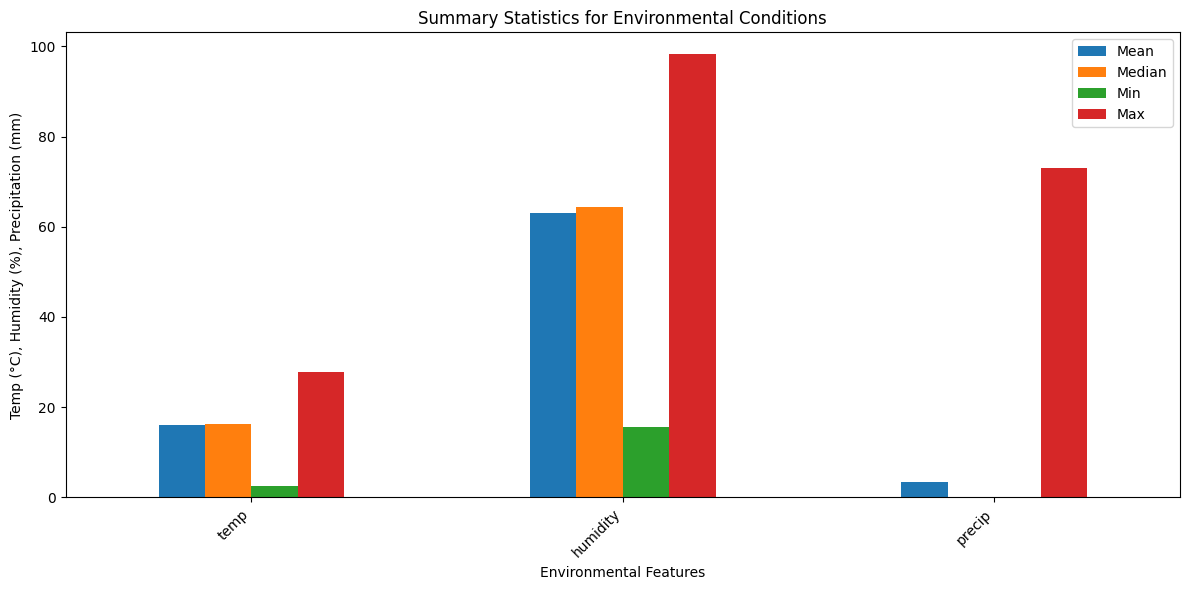

In [ ]:
import matplotlib.pyplot as plt

# Environmental conditions
env_conditions = merged_df[['temp', 'humidity', 'precip']]
env_summary_stats = env_conditions.describe().loc[['mean', '50%', 'min', 'max']].T
env_summary_stats.columns = ['Mean', 'Median', 'Min', 'Max']

ax1 = env_summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics for Environmental Conditions')
plt.ylabel('Temp (°C), Humidity (%), Precipitation (mm)')
plt.xlabel('Environmental Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


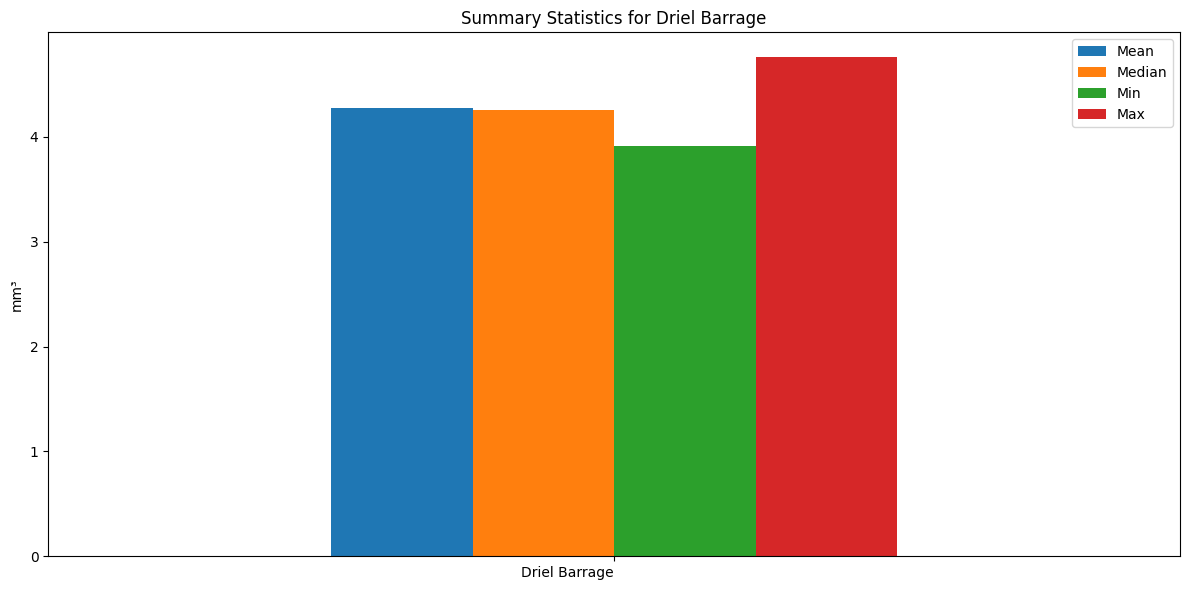

In [ ]:
# Driel Barrage
driel_barrage = merged_df[['Driel Barrage']]
driel_summary_stats = driel_barrage.describe().loc[['mean', '50%', 'min', 'max']].T
driel_summary_stats.columns = ['Mean', 'Median', 'Min', 'Max']

ax2 = driel_summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics for Driel Barrage')
plt.ylabel('mm³')
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.show()


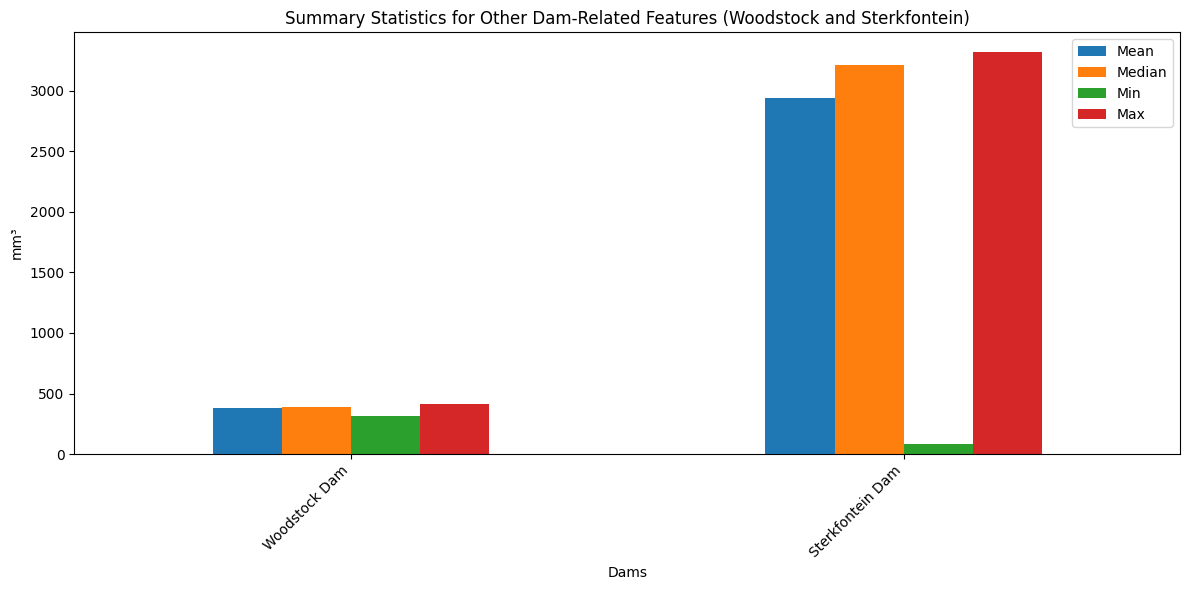

In [ ]:
# Other dam-related features (Woodstock Dam and Sterkfontein Dam)
other_dams = merged_df[['Woodstock Dam', 'Sterkfontein Dam']]
other_dams_summary_stats = other_dams.describe().loc[['mean', '50%', 'min', 'max']].T
other_dams_summary_stats.columns = ['Mean', 'Median', 'Min', 'Max']

ax3 = other_dams_summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics for Other Dam-Related Features (Woodstock and Sterkfontein)')
plt.ylabel('mm³')
plt.xlabel('Dams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


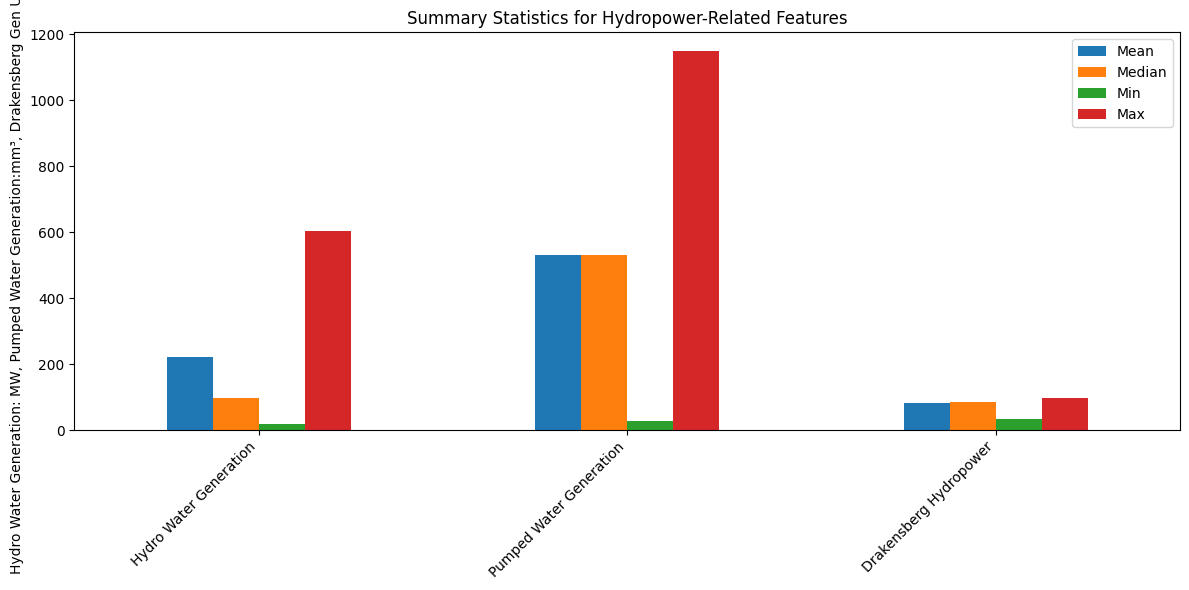

In [ ]:
# Hydropower-related features
hydropower = merged_df[['Hydro Water Generation', 'Pumped Water Generation', 'Drakensberg Hydropower']]
hydro_summary_stats = hydropower.describe().loc[['mean', '50%', 'min', 'max']].T
hydro_summary_stats.columns = ['Mean', 'Median', 'Min', 'Max']
ax4 = hydro_summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics for Hydropower-Related Features')
plt.ylabel('Hydro Water Generation: MW, Pumped Water Generation:mm³, Drakensberg Gen Unit Hours: MWh')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation matrix

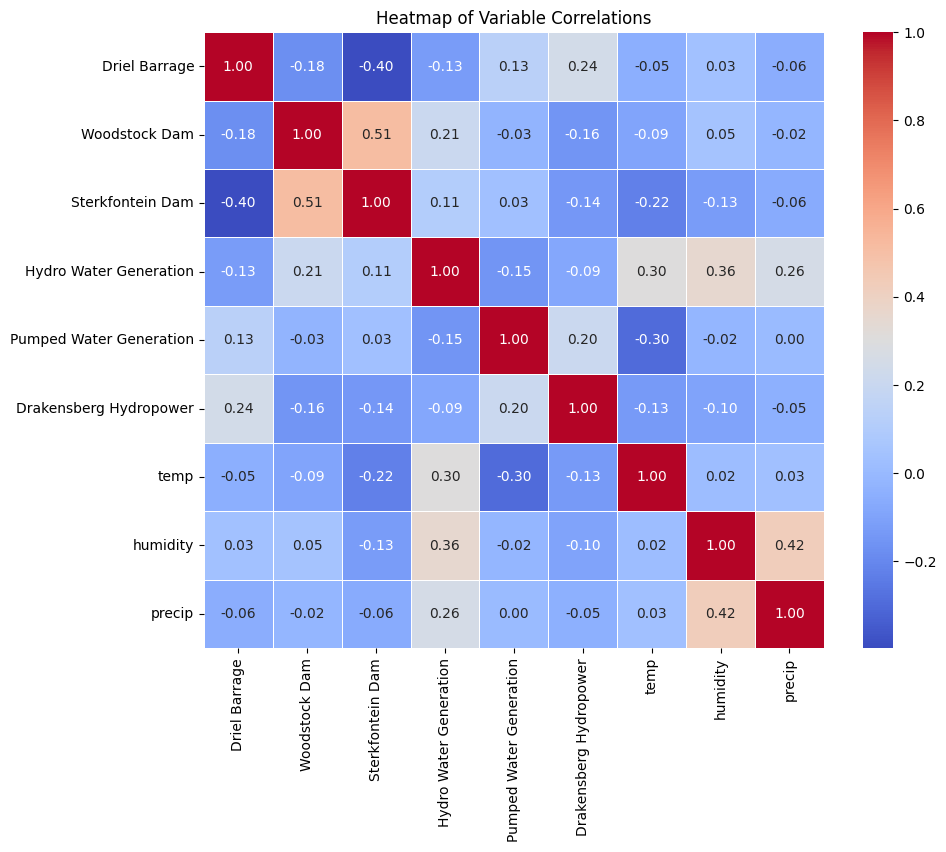

In [ ]:
correlation_matrix = merged_df[[
    'Driel Barrage', 'Woodstock Dam', 'Sterkfontein Dam',
    'Hydro Water Generation', 'Pumped Water Generation',
    'Drakensberg Hydropower', 'temp', 'humidity', 'precip'
]].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [ ]:
# Count the number of rows and columns in the DataFrame
num_rows = merged_df.shape[0]
num_columns = merged_df.shape[1]

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 1491
Number of columns: 9


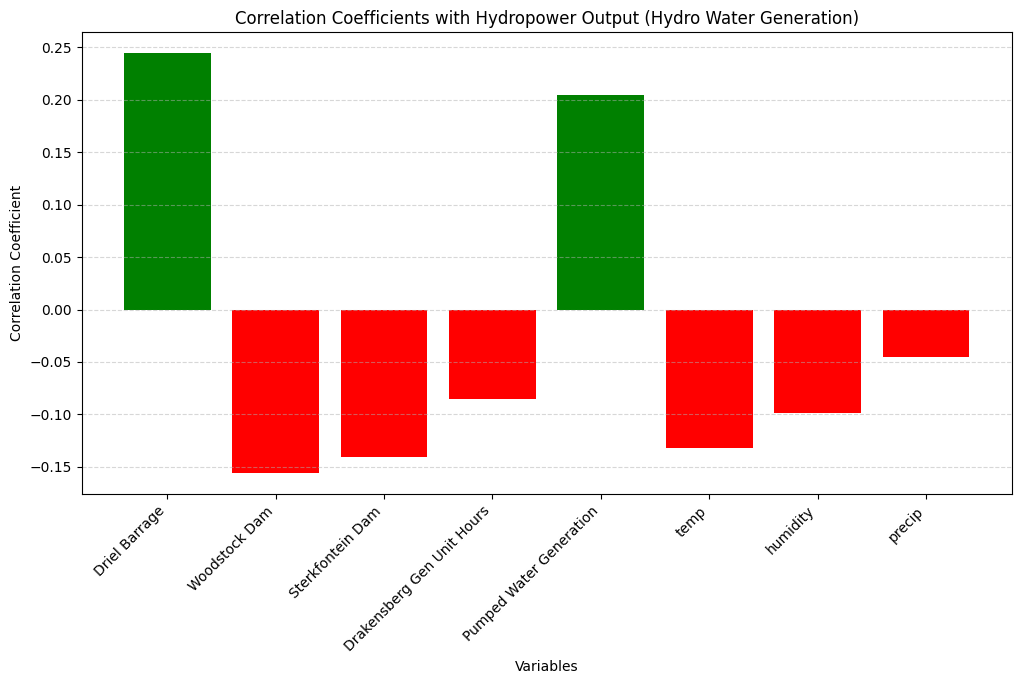

In [ ]:
import matplotlib.pyplot as plt

# Data for correlation coefficients
variables = [
    'Driel Barrage', 'Woodstock Dam', 'Sterkfontein Dam',
    'Drakensberg Gen Unit Hours', 'Pumped Water Generation',
    'temp', 'humidity', 'precip'
]
coefficients = [0.244246, -0.156132, -0.140900, -0.085604, 0.204318, -0.131595, -0.098822, -0.045173]

# Plotting the correlation coefficients as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(variables, coefficients, color=['green' if coef > 0 else 'red' for coef in coefficients])
plt.title('Correlation Coefficients with Hydropower Output (Hydro Water Generation)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Download April - Oct 2 week data from: https://www.visualcrossing.com/weather/weather-data-services/drakensberg/metric/2022-09-01/2023-03-31

# **Buidling and training the models**

Standarzed for KNN and not for Random forest

# *KNN1*

In [ ]:
# Split the data into features and target
X = merged_df.drop(columns=['Hydro Water Generation'])  # Features
y = merged_df['Hydro Water Generation']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Initialize the KNN regressor
knn1 = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation for RMSE
cv_scores_rmse = cross_val_score(knn1, X_train_standardized, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores_rmse)

# Perform cross-validation for MAE
cv_scores_mae = cross_val_score(knn1, X_train_standardized, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores_mae  # Negate to make MAE positive

# Perform cross-validation for R²
cv_scores_r2 = cross_val_score(knn1, X_train_standardized, y_train, cv=5, scoring='r2')
cv_r2 = cv_scores_r2  # R2 is directly usable

# Training the model
knn1.fit(X_train_standardized, y_train)

# Making predictions on the test set
y_pred_knn1 = knn1.predict(X_test_standardized)

# Calculate metrics on the test set
rmse_knn1 = np.sqrt(mean_squared_error(y_test, y_pred_knn1))
mae_knn1 = mean_absolute_error(y_test, y_pred_knn1)
r2_knn1 = r2_score(y_test, y_pred_knn1)

# Display results
print("Cross-Validation Results:")
print("CV RMSE scores:", cv_rmse)
print("Average CV RMSE:", cv_rmse.mean())
print("Standard Deviation of CV RMSE:", cv_rmse.std())
print("CV MAE scores:", cv_mae)
print("Average CV MAE:", cv_mae.mean())
print("Standard Deviation of CV MAE:", cv_mae.std())
print("CV R² scores:", cv_r2)
print("Average CV R²:", cv_r2.mean())
print("Standard Deviation of CV R²:", cv_r2.std())

print("\nTest Set Results:")
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_knn1)
print("Mean Absolute Error (MAE) on Test Set:", mae_knn1)
print("R-squared (R²) on Test Set:", r2_knn1)



Cross-Validation Results:
CV RMSE scores: [160.75776975 142.50792778 146.65558792 144.59361165 151.58739011]
Average CV RMSE: 149.22045744126117
Standard Deviation of CV RMSE: 6.507783918567356
CV MAE scores: [111.97782779  96.21326489  96.19412598 100.23563803 103.53076859]
Average CV MAE: 101.6303250551727
Standard Deviation of CV MAE: 5.8570376747216315
CV R² scores: [0.41012312 0.561574   0.35089086 0.53017473 0.47718732]
Average CV R²: 0.46599000623177717
Standard Deviation of CV R²: 0.07713660593008122

Test Set Results:
Root Mean Squared Error (RMSE) on Test Set: 149.86786141288846
Mean Absolute Error (MAE) on Test Set: 97.59155883500557
R-squared (R²) on Test Set: 0.4638902224343089


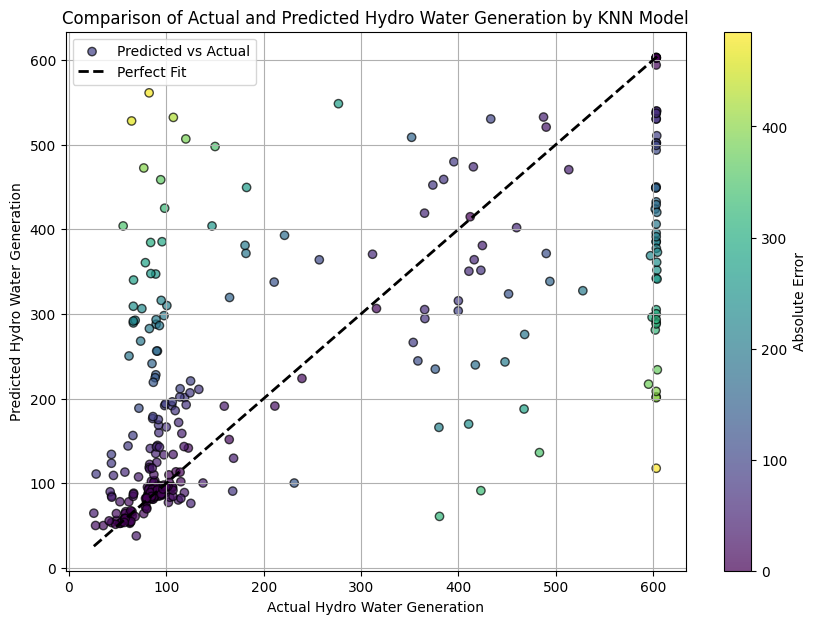

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_knn1 - y_test)  # Calculate absolute errors between predictions and actual values

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_knn1, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Comparison of Actual and Predicted Hydro Water Generation by KNN Model')
plt.legend()
plt.grid(True)
plt.show()


# **Scenario one**

In [ ]:
# Load and prepare data
X = merged_df.drop(columns=['Hydro Water Generation'])
y = merged_df['Hydro Water Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best features based on univariate linear regression tests
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Set up hyperparameters for KNN and perform Grid Search
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_knn2.fit(X_train_selected, y_train)

# Best parameters and estimator for KNN2
print("Best parameters for KNN2:", grid_search_knn2.best_params_)

# Cross-Validation (Evaluation) Metrics
cv_scores_rmse = cross_val_score(grid_search_knn2.best_estimator_, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_knn2 = np.sqrt(-cv_scores_rmse.mean())  # Convert to positive and compute mean
cv_scores_mae = cross_val_score(grid_search_knn2.best_estimator_, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_knn2 = -cv_scores_mae.mean()  # Convert to positive and compute mean
cv_scores_r2 = cross_val_score(grid_search_knn2.best_estimator_, X_train_selected, y_train, cv=5, scoring='r2')
cv_r2_knn2 = cv_scores_r2.mean()  # Compute mean

# Output Cross-Validation Results
print("\nCross-Validation Metrics for KNN2:")
print(f"Cross-Validation RMSE: {cv_rmse_knn2:.2f}")
print(f"Cross-Validation MAE: {cv_mae_knn2:.2f}")
print(f"Cross-Validation R²: {cv_r2_knn2:.2f}")

# Predict using the optimized KNN model on the test data (Testing Metrics)
y_pred_knn2 = grid_search_knn2.best_estimator_.predict(X_test_selected)
test_mae_knn2 = mean_absolute_error(y_test, y_pred_knn2)
test_rmse_knn2 = np.sqrt(mean_squared_error(y_test, y_pred_knn2))
test_r2_knn2 = r2_score(y_test, y_pred_knn2)

# Output Testing Metrics
print("\nTesting Metrics for KNN2:")
print(f"Mean Absolute Error (MAE) on Test Set for KNN2: {test_mae_knn2:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set for KNN2: {test_rmse_knn2:.2f}")
print(f"R-squared (R²) on Test Set for KNN2: {test_r2_knn2:.2f}")


Fitting 5 folds for each of 196 candidates, totalling 980 fits
Best parameters for KNN2: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

Cross-Validation Metrics for KNN2:
Cross-Validation RMSE: 126.70
Cross-Validation MAE: 80.12
Cross-Validation R²: 0.61

Testing Metrics for KNN2:
Mean Absolute Error (MAE) on Test Set for KNN2: 76.97
Root Mean Squared Error (RMSE) on Test Set for KNN2: 124.24
R-squared (R²) on Test Set for KNN2: 0.63


In [ ]:
# Get feature scores from SelectKBest
feature_scores = selector.scores_

# Create a DataFrame to view feature importance rankings
feature_importance_knn = pd.DataFrame({'Feature': X.columns, 'Importance': feature_scores})
feature_importance_knn = feature_importance_knn.sort_values(by='Importance', ascending=False)

Improving KNN through feature selection

In [ ]:
#Remove
merged_df.head()

,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Hydropower,temp,humidity,precip
0,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500,14.6,84.8,9.320
1,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167,12.0,81.5,9.361
2,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500,12.5,79.9,0.400
3,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667,14.8,80.7,3.622
4,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333,17.0,66.3,0.175


In [ ]:


# Calculate the average of the Hydro Water Generation column
average_hydro_generation = merged_df['Hydro Water Generation'].mean()

# Print the average
print("Average Hydro Water Generation:", average_hydro_generation)


Average Hydro Water Generation: 221.14875511401746


In [ ]:
merged_df.head()


,Driel Barrage,Woodstock Dam,Sterkfontein Dam,Hydro Water Generation,Pumped Water Generation,Drakensberg Hydropower,temp,humidity,precip
0,4.528748,375.915016,2976.443675,68.666667,622.833333,90.712500,14.6,84.8,9.320
1,4.530688,388.159238,2999.469856,61.458333,880.750000,89.504167,12.0,81.5,9.361
2,4.530688,388.159238,2999.469856,62.500000,651.250000,86.812500,12.5,79.9,0.400
3,4.530688,388.159238,2999.469856,62.541667,809.625000,86.166667,14.8,80.7,3.622
4,4.530688,388.159238,2999.469856,63.125000,596.750000,87.858333,17.0,66.3,0.175


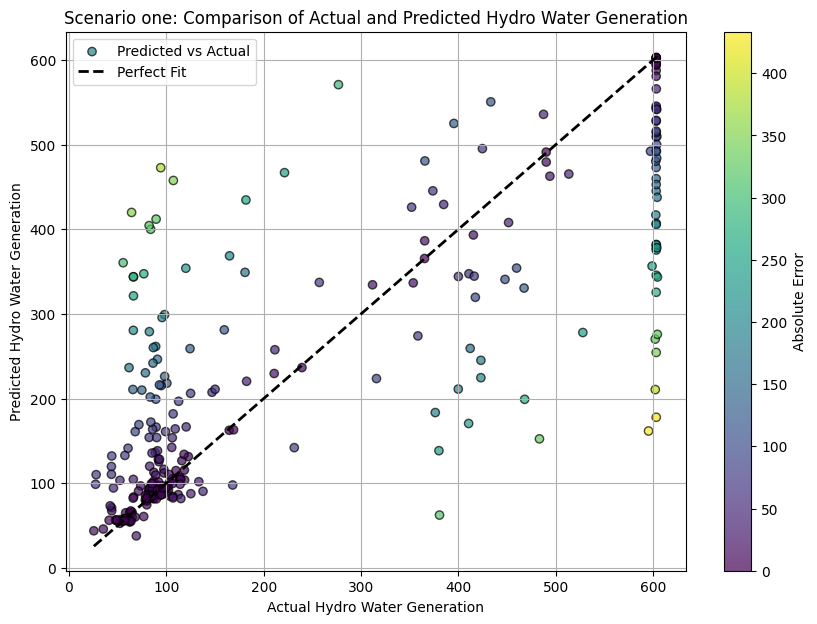

In [ ]:
# Calculate absolute errors for color coding in the scatter plot
errors = np.abs(y_pred_knn2 - y_test)

# Create the plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_knn2, c=errors, cmap='viridis', alpha=0.7, edgecolor='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Scenario one: Comparison of Actual and Predicted Hydro Water Generation')
plt.legend()
plt.grid(True)
plt.show()


# *Random Forest**

# ***Random Forest1***

In [ ]:
# Assuming merged_df is your DataFrame and loaded properly
X = merged_df.drop(['Hydro Water Generation'], axis=1)  # Use all other variables as predictors
y = merged_df['Hydro Water Generation']  # Response variable

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the RandomForest model
rf1 = RandomForestRegressor(n_estimators=100, random_state=0)

# Fitting rf1 on the training data
rf1.fit(X_train, y_train)

# Using cross-validation to evaluate rf1's performance
cv_r2_scores_rf1 = cross_val_score(rf1, X_train, y_train, cv=5, scoring='r2')
cv_mse_scores_rf1 = cross_val_score(rf1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating mean scores for evaluation metrics
mean_cv_r2_rf1 = np.mean(cv_r2_scores_rf1)
mean_cv_mse_rf1 = -np.mean(cv_mse_scores_rf1)  # Negate to convert scores to positive MSE
mean_cv_rmse_rf1 = np.sqrt(mean_cv_mse_rf1)  # Calculate RMSE from MSE

# Predicting the test results with rf1
y_pred_rf1 = rf1.predict(X_test)

# Evaluating rf1 on the test set
mse_test_rf1 = mean_squared_error(y_test, y_pred_rf1)
rmse_test_rf1 = np.sqrt(mse_test_rf1)
r2_test_rf1 = r2_score(y_test, y_pred_rf1)

# Outputting evaluation metrics from cross-validation and testing metrics
print("Evaluation Metrics (Cross-Validation) for RF1:")
print(f"Cross-Validation Mean R² Score for RF1: {mean_cv_r2_rf1:.3f}")
print(f"Cross-Validation Mean RMSE for RF1: {mean_cv_rmse_rf1:.2f}")

print("\nTesting Metrics for RF1:")
print(f"Root Mean Squared Error (RMSE) on Test Set for RF1: {rmse_test_rf1:.2f}")
print(f"R-squared (R²) on Test Set for RF1: {r2_test_rf1:.3f}")


Evaluation Metrics (Cross-Validation) for RF1:
Cross-Validation Mean R² Score for RF1: 0.710
Cross-Validation Mean RMSE for RF1: 111.34

Testing Metrics for RF1:
Root Mean Squared Error (RMSE) on Test Set for RF1: 110.23
R-squared (R²) on Test Set for RF1: 0.705


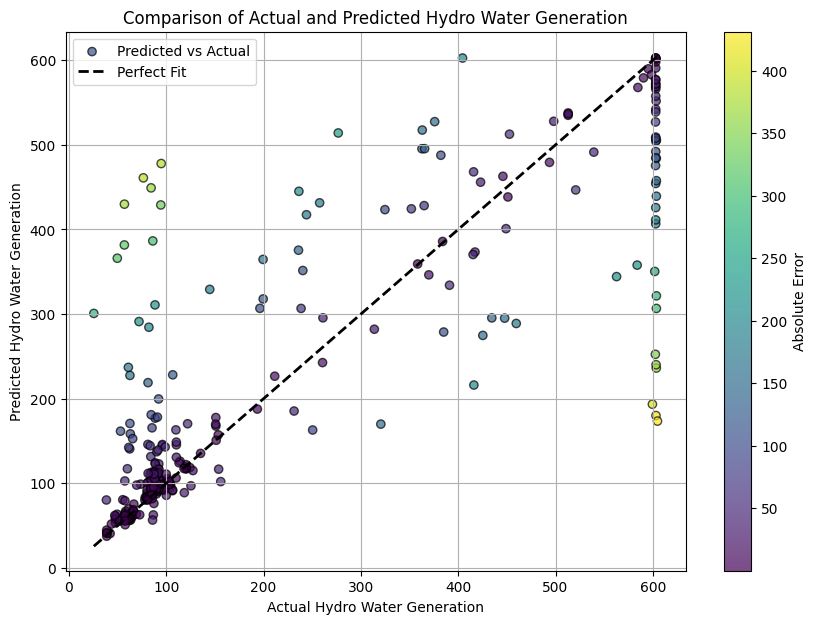

In [ ]:
# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_rf1 - y_test)  # Calculate absolute errors between predictions and actual values

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_rf1, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Comparison of Actual and Predicted Hydro Water Generation')
plt.legend()
plt.grid(True)
plt.show()




# ***KNN1 and Random Forest1 ensemble model***

In [ ]:
# Assuming 'merged_df' is your DataFrame and loaded properly
X = merged_df.drop(columns=['Hydro Water Generation'])  # Independent features
y = merged_df['Hydro Water Generation']  # Dependent variable, the target

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data standardization for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model with scaled data
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)
y_pred_knn = knn_regressor.predict(X_test_scaled)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Creating and training the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)  # Note: RandomForest does not require scaled data
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Ensemble: Average the predictions from KNN and RandomForest
y_pred_ensemble = (y_pred_knn + y_pred_rf) / 2
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Outputting evaluation metrics for each model and the ensemble
print("KNN Regressor Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"R-squared (R²): {r2_knn:.2f}")

print("\nRandomForest Regressor Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

print("\nEnsemble Model Performance Metrics:")
print(f"Mean Absolute Error (MAE) for Ensemble: {mae_ensemble:.2f}")
print(f"R-squared (R²) for Ensemble: {r2_ensemble:.2f}")


KNN Regressor Performance Metrics:
Mean Absolute Error (MAE): 97.59
R-squared (R²): 0.46

RandomForest Regressor Performance Metrics:
Mean Absolute Error (MAE): 63.65
R-squared (R²): 0.71

Ensemble Model Performance Metrics:
Mean Absolute Error (MAE) for Ensemble: 77.65
R-squared (R²) for Ensemble: 0.66


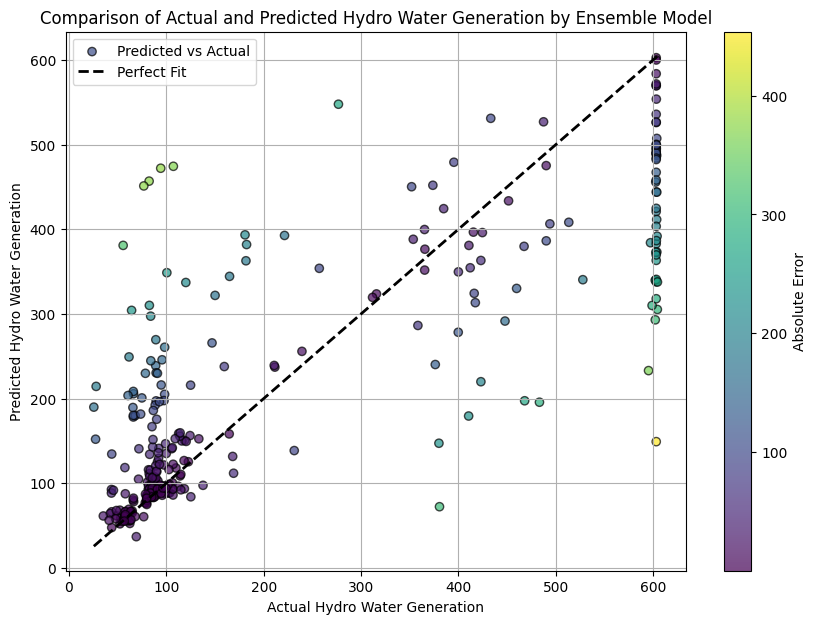

In [ ]:
# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_ensemble - y_test)

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_ensemble, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Comparison of Actual and Predicted Hydro Water Generation by Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()




# **KNN2 and Random Forest1**

In [ ]:
X = merged_df.drop(columns=['Hydro Water Generation'])
y = merged_df['Hydro Water Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best features using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# KNN Model using GridSearchCV to find the best parameters
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_knn2.fit(X_train_selected, y_train)

# Predict using the optimized KNN model
y_pred_knn2 = grid_search_knn2.best_estimator_.predict(X_test_selected)

# Evaluation Metrics for KNN2
test_mae_knn2 = mean_absolute_error(y_test, y_pred_knn2)
test_rmse_knn2 = np.sqrt(mean_squared_error(y_test, y_pred_knn2))
test_r2_knn2 = r2_score(y_test, y_pred_knn2)

print("Testing Metrics for KNN2:")
print(f"Mean Absolute Error (MAE): {test_mae_knn2:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_knn2:.2f}")
print(f"R-squared (R²): {test_r2_knn2:.2f}")

# RandomForest Model as RF1
rf1 = RandomForestRegressor(n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)

# Evaluation Metrics for RF1
test_mse_rf1 = mean_squared_error(y_test, y_pred_rf1)
test_rmse_rf1 = np.sqrt(test_mse_rf1)
test_r2_rf1 = r2_score(y_test, y_pred_rf1)

print("\nTesting Metrics for RF1:")
print(f"Mean Squared Error (MSE): {test_mse_rf1:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_rf1:.2f}")
print(f"R-squared (R²): {test_r2_rf1:.2f}")

# Ensemble Model averaging predictions from KNN2 and RF1
y_pred_ensemble = (y_pred_knn2 + y_pred_rf1) / 2

# Calculate the weighted average of predictions from both models
y_pred_ensemble = (0.7 * y_pred_rf1) + (0.3 * y_pred_knn2)

# Evaluation Metrics for the Ensemble Model
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Model Performance Metrics:")
print(f"Mean Squared Error (MSE) for Ensemble: {ensemble_mse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Ensemble: {ensemble_rmse:.2f}")
print(f"R-squared (R²) for Ensemble: {ensemble_r2:.2f}")



Fitting 5 folds for each of 196 candidates, totalling 980 fits
Testing Metrics for KNN2:
Mean Absolute Error (MAE): 76.97
Root Mean Squared Error (RMSE): 124.24
R-squared (R²): 0.63

Testing Metrics for RF1:
Mean Squared Error (MSE): 12070.59
Root Mean Squared Error (RMSE): 109.87
R-squared (R²): 0.71

Ensemble Model Performance Metrics:
Mean Squared Error (MSE) for Ensemble: 11877.16
Root Mean Squared Error (RMSE) for Ensemble: 108.98
R-squared (R²) for Ensemble: 0.72


Graph

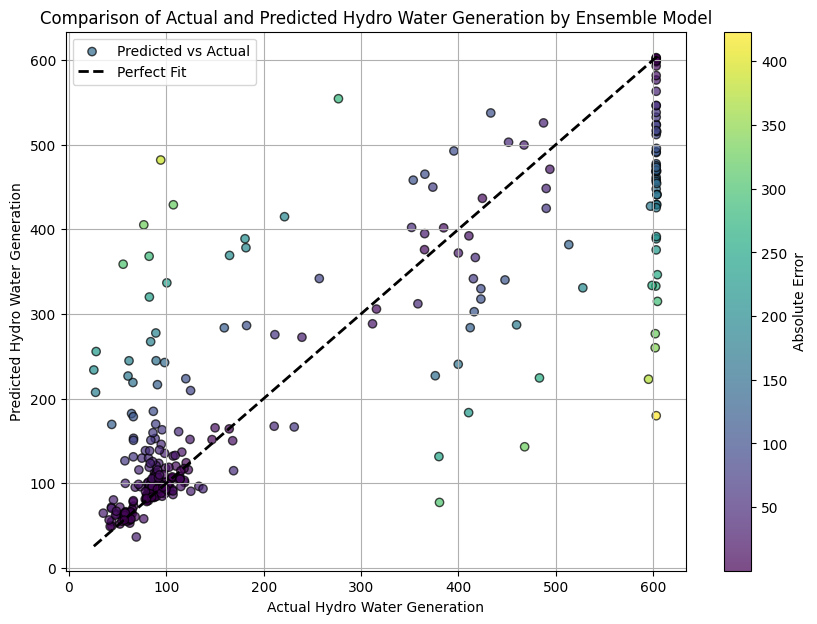

In [ ]:
# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_ensemble - y_test)  # Calculate absolute errors between predictions and actual values

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_ensemble, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Comparison of Actual and Predicted Hydro Water Generation by Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()


esemble random forest and KNN

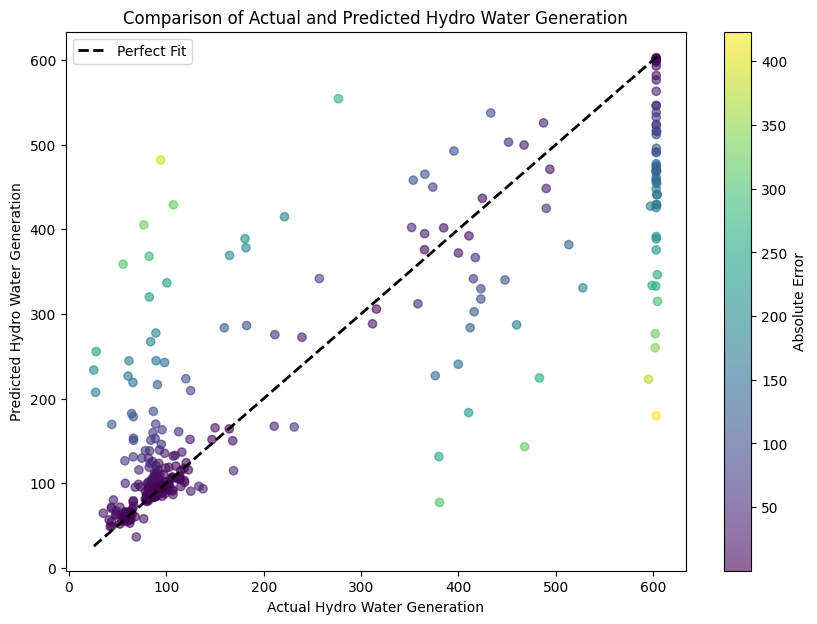

In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_ensemble
})
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual'] - comparison_df['Predicted'])

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(comparison_df['Actual'], comparison_df['Predicted'],
                      c=comparison_df['Absolute Error'], cmap='viridis', alpha=0.6)
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error')

# Add a line for perfect predictions
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Comparison of Actual and Predicted Hydro Water Generation')
plt.legend()
plt.show()



# ***Random Forest2***

In [ ]:
X = merged_df.drop(['Hydro Water Generation'], axis=1)  # Exclude target variable from the features
y = merged_df['Hydro Water Generation']  # Define the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV with RandomForestRegressor and the parameter grid
rnd_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0),
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit RandomizedSearchCV on the training data
rnd_search.fit(X_train, y_train)

# Retrieve the best estimator found by RandomizedSearchCV
best_rf2 = rnd_search.best_estimator_

# Predict using the best model on the test set
y_pred_rf2 = best_rf2.predict(X_test)

# Evaluate the predictions using RMSE, R2, and MAE on the test set
rmse_rf2 = np.sqrt(mean_squared_error(y_test, y_pred_rf2))
r2_rf2 = r2_score(y_test, y_pred_rf2)
mae_rf2 = mean_absolute_error(y_test, y_pred_rf2)

# Print testing metrics
print("Testing Metrics for RF2:")
print(f"Mean Absolute Error (MAE): {mae_rf2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf2:.2f}")
print(f"R-squared (R²): {r2_rf2:.2f}")

# Calculate and print cross-validation metrics for RMSE, MAE, and R²
cv_mae = -np.mean(cross_val_score(best_rf2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
cv_rmse = np.sqrt(-np.mean(cross_val_score(best_rf2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
cv_r2 = np.mean(cross_val_score(best_rf2, X_train, y_train, cv=5, scoring='r2'))

print("\nCross-Validation Metrics for RF2:")
print(f"Cross-Validation Mean Absolute Error (MAE): {cv_mae:.2f}")
print(f"Cross-Validation Root Mean Squared Error (RMSE): {cv_rmse:.2f}")
print(f"Cross-Validation R² Score: {cv_r2:.2f}")

# Best parameters found
print("\nBest Parameters:", rnd_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Testing Metrics for RF2:
Mean Absolute Error (MAE): 60.15
Root Mean Squared Error (RMSE): 107.97
R-squared (R²): 0.72

Cross-Validation Metrics for RF2:
Cross-Validation Mean Absolute Error (MAE): 64.38
Cross-Validation Root Mean Squared Error (RMSE): 109.85
Cross-Validation R² Score: 0.72

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}



Feature Importances:
                   Feature  Importance
1            Woodstock Dam    0.289236
2         Sterkfontein Dam    0.208937
5                     temp    0.172145
0            Driel Barrage    0.125696
6                 humidity    0.074833
4   Drakensberg Hydropower    0.048131
7                   precip    0.044042
3  Pumped Water Generation    0.036980


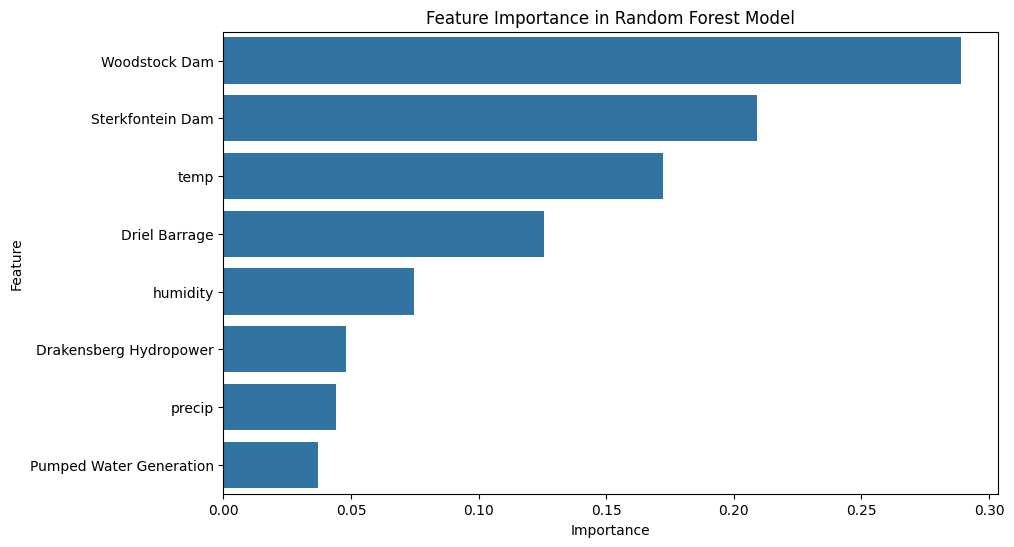

In [ ]:
# Get feature importances
importances = best_rf2.feature_importances_

# Create a DataFrame to view the features and their importance scores
features = X_train.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances:")
print(feature_importance)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()


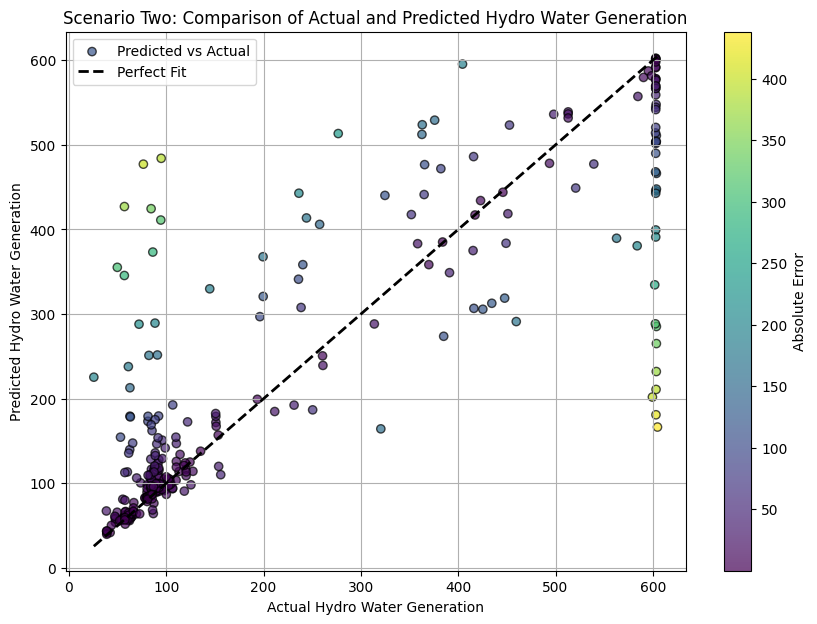

In [ ]:
# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_rf2 - y_test)  # Calculate absolute errors between predictions and actual values

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_rf2, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Scenario Two: Comparison of Actual and Predicted Hydro Water Generation')
plt.legend()
plt.grid(True)
plt.show()


# ***KNN 2 and random forest 2***


In [ ]:
# Assuming 'merged_df' is your DataFrame and loaded correctly
X = merged_df.drop(columns=['Hydro Water Generation'])
y = merged_df['Hydro Water Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best features based on univariate linear regression tests
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# KNN Model Configuration
param_grid_knn = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=1)
knn_model.fit(X_train_selected, y_train)
best_knn = knn_model.best_estimator_

# RandomForest Model Configuration
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1)
rf_model.fit(X_train, y_train)
best_rf = rf_model.best_estimator_

# Testing Metrics for KNN
y_pred_knn = best_knn.predict(X_test_selected)
knn_test_mae = mean_absolute_error(y_test, y_pred_knn)
knn_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_test_r2 = r2_score(y_test, y_pred_knn)

# Testing Metrics for RandomForest
y_pred_rf = best_rf.predict(X_test)
rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_test_r2 = r2_score(y_test, y_pred_rf)

# Ensemble Testing Metrics
ensemble_pred_test = (y_pred_knn + y_pred_rf) / 2
ensemble_test_mae = mean_absolute_error(y_test, ensemble_pred_test)
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred_test))
ensemble_test_r2 = r2_score(y_test, ensemble_pred_test)

# Setup cross-validation for Ensemble Evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_cv_mae = []
ensemble_cv_rmse = []
ensemble_cv_r2 = []

# Iterate over cross-validation folds for Ensemble
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train KNN and RF on folds
    knn_fold = clone(best_knn)
    rf_fold = clone(best_rf)
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)
    X_train_fold_selected = selector.fit_transform(X_train_fold_scaled, y_train_fold)
    X_test_fold_selected = selector.transform(X_test_fold_scaled)

    knn_fold.fit(X_train_fold_selected, y_train_fold)
    rf_fold.fit(X_train_fold, y_train_fold)
    y_pred_knn_fold = knn_fold.predict(X_test_fold_selected)
    y_pred_rf_fold = rf_fold.predict(X_test_fold)

    # Combine fold predictions
    y_pred_ensemble_fold = (y_pred_knn_fold + y_pred_rf_fold) / 2

    # Compute fold metrics
    fold_mae = mean_absolute_error(y_test_fold, y_pred_ensemble_fold)
    fold_rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred_ensemble_fold))
    fold_r2 = r2_score(y_test_fold, y_pred_ensemble_fold)

    ensemble_cv_mae.append(fold_mae)
    ensemble_cv_rmse.append(fold_rmse)
    ensemble_cv_r2.append(fold_r2)


print(f"MAE: {rf_test_mae:.2f}, RMSE: {rf_test_rmse:.2f}, R²: {rf_test_r2:.2f}")
print("Testing Metrics for Ensemble:")
print(f"MAE: {ensemble_test_mae:.2f}, RMSE: {ensemble_test_rmse:.2f}, R²: {ensemble_test_r2:.2f}")
print("\nCross-Validation Metrics for Ensemble:")
print(f"Average MAE: {np.mean(ensemble_cv_mae):.2f}, Average RMSE: {np.mean(ensemble_cv_rmse):.2f}, Average R²: {np.mean(ensemble_cv_r2):.2f}")




Fitting 5 folds for each of 196 candidates, totalling 980 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
MAE: 63.10, RMSE: 107.35, R²: 0.72
Testing Metrics for Ensemble:
MAE: 68.38, RMSE: 109.51, R²: 0.71

Cross-Validation Metrics for Ensemble:
Average MAE: 68.74, Average RMSE: 109.59, Average R²: 0.72


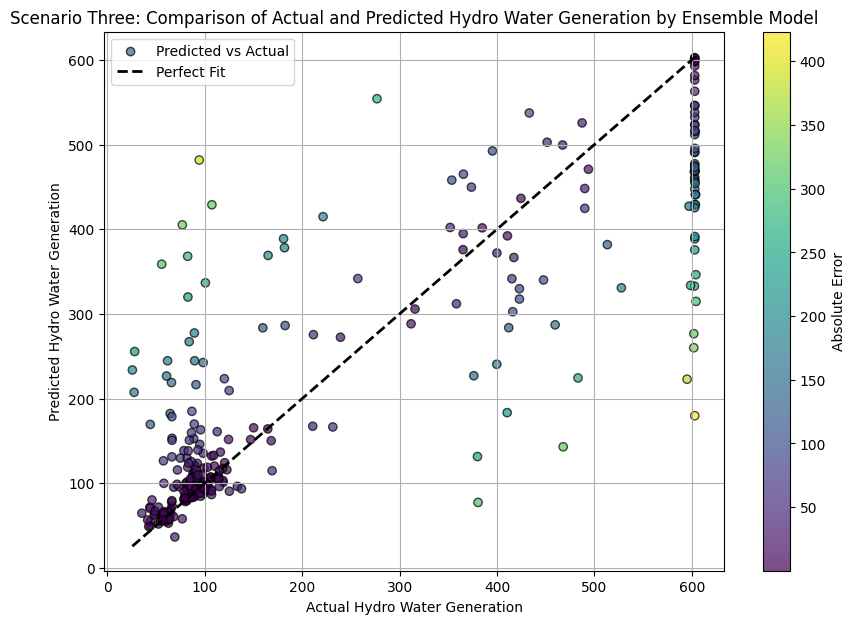

In [ ]:
# Calculate absolute errors for color coding in the plot
errors = np.abs(y_pred_ensemble - y_test)  # Calculate absolute errors between predictions and actual values

# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_pred_ensemble, c=errors, cmap='viridis', alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.colorbar(scatter, label='Absolute Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Hydro Water Generation')
plt.ylabel('Predicted Hydro Water Generation')
plt.title('Scenario Three: Comparison of Actual and Predicted Hydro Water Generation by Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()
